In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=2.4)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# load dataset
df = pd.read_excel(r'part6\Historical Weather Data 2010-2021.xlsx', sheet_name='201021')
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,45,6.91,7.18,1709.0,NO,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,45,6.77,7.66,1707.0,YES,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,41,6.76,7.44,1707.0,NO,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,43,7.10,7.43,1708.0,NO,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,44,6.53,8.05,1709.0,NO,NaN,NaN,NaN,NaN,NaN


In [4]:
# list of columns
print(list(df.columns))

['observation', 'tempC_7to8', 'tempC_1to2', 'tempC_6to7', 'tempC_avg(0C)', 'Relative humidity_7to8', 'Relative humidity_1to2', 'Relative humidity_6to7', 'Relative humidity_avg(%)', 'windspeedKmph_7to8', 'windspeedKmph_1to2', 'windspeedKmph_6to7', 'windspeedKmph_avg(Km/h)', 'pressureMB_7to8', 'pressureMB_1to2', 'pressureMB_6to7', 'pressureMB_avg', 'precipMM_7to8', 'precipMM_1to2', 'precipMM_6to7', 'precipMM_avg(mm)', 'weatherDesc_7to8', 'weatherDesc_1to2', 'weatherDesc_6to7', 'Sunshine Hours', '%_soil_moisure', 'soil_pH', 'water_pH', 'water_TDS_mgpl', 'Label (Disease Yes/No)', 'Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora']


In [5]:
# dataframe raw information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   observation                               4227 non-null   datetime64[ns]
 1   tempC_7to8                                4227 non-null   int64         
 2   tempC_1to2                                4227 non-null   int64         
 3   tempC_6to7                                4227 non-null   int64         
 4   tempC_avg(0C)                             4227 non-null   int64         
 5   Relative humidity_7to8                    4227 non-null   int64         
 6   Relative humidity_1to2                    4227 non-null   int64         
 7   Relative humidity_6to7                    4227 non-null   int64         
 8   Relative humidity_avg(%)                  4227 non-null   int64         
 9   windspeedKmph_7to8            

# Observation:
- null values with columns :- 

> 30  Type of Disease (Bacterial Blight/Telya)  1174 non-null   object        
> 31  Anthracnose                               676 non-null    object        
> 32  Fruit Spot/ Rot                           464 non-null    object        
> 33  Fusarium Wilt                             103 non-null    object        
> 34  Fruit Borer / Blight Blora                787 non-null    object

- categorical columns :- 

> 21  weatherDesc_7to8                          4227 non-null   object        
> 22  weatherDesc_1to2                          4227 non-null   object        
> 23  weatherDesc_6to7                          4227 non-null   object
> 29  Label (Disease Yes/No)                    4227 non-null   object        
> 30  Type of Disease (Bacterial Blight/Telya)  1174 non-null   object        
> 31  Anthracnose                               676 non-null    object        
> 32  Fruit Spot/ Rot                           464 non-null    object        
> 33  Fusarium Wilt                             103 non-null    object        
> 34  Fruit Borer / Blight Blora                787 non-null    object 


In [7]:
df['Label (Disease Yes/No)'].unique()

array(['NO', 'YES', 'yes', 'Yes'], dtype=object)

In [8]:
df['Label (Disease Yes/No)'].value_counts()

NO     2470
YES    1746
yes      10
Yes       1
Name: Label (Disease Yes/No), dtype: int64

In [9]:
df['Label (Disease Yes/No)'] = np.where(df['Label (Disease Yes/No)'] == 'NO',0,1)
df.head()

,observation,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,...,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No),Type of Disease (Bacterial Blight/Telya),Anthracnose,Fruit Spot/ Rot,Fusarium Wilt,Fruit Borer / Blight Blora
0,2010-01-01,20,30,20,23,42,33,59,44,9,...,45,6.91,7.18,1709.0,0,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,23,29,23,25,49,40,62,50,9,...,45,6.77,7.66,1707.0,1,Bacterial Blight,Anthracnose,NaN,NaN,NaN
2,2010-01-03,24,27,21,24,61,50,78,63,4,...,41,6.76,7.44,1707.0,0,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,23,29,20,24,57,30,52,46,5,...,43,7.10,7.43,1708.0,0,NaN,NaN,NaN,NaN,NaN
4,2010-01-05,22,30,21,24,48,34,54,45,6,...,44,6.53,8.05,1709.0,0,NaN,NaN,NaN,NaN,NaN


In [10]:
df['Label (Disease Yes/No)'].unique()

array([0, 1])

In [11]:
df['Label (Disease Yes/No)'].value_counts()

0    2470
1    1757
Name: Label (Disease Yes/No), dtype: int64

# Observation:
- categorical variables converted to number.
- **Dummy Coding:** Dummy coding is a commonly used method for converting a categorical input variable into continuous variable. ‘Dummy’, as the name suggests is a duplicate variable which represents one level of a categorical variable. Presence of a level is represent by 1 and absence is represented by 0. For every level present, one dummy variable will be created.

In [12]:
df.describe()

,tempC_7to8,tempC_1to2,tempC_6to7,tempC_avg(0C),Relative humidity_7to8,Relative humidity_1to2,Relative humidity_6to7,Relative humidity_avg(%),windspeedKmph_7to8,windspeedKmph_1to2,...,precipMM_7to8,precipMM_1to2,precipMM_6to7,precipMM_avg(mm),Sunshine Hours,%_soil_moisure,soil_pH,water_pH,water_TDS_mgpl,Label (Disease Yes/No)
count,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000,...,4227.000000,4227.000000,4227.000000,4227.000000,4227.00000,4227.000000,4227.000000,4227.000000,4227.000000,4227.000000
mean,25.442631,30.345635,24.677313,26.489236,54.340194,41.961675,57.377573,50.893542,10.160161,12.697894,...,0.049799,0.125905,0.210054,0.128586,8.29392,45.418737,7.029707,7.482685,1703.469375,0.415661
std,3.707631,4.409258,3.797272,3.558857,23.713679,25.747177,25.953148,24.644506,5.859423,7.132430,...,0.290008,0.342865,0.787239,0.376221,2.61489,10.338850,0.256483,0.500309,19.377816,0.492894
min,12.000000,17.000000,15.000000,17.000000,6.000000,4.000000,8.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.80000,30.000000,6.500000,6.500000,1624.500000,0.000000
25%,23.000000,27.000000,22.000000,24.000000,34.000000,19.000000,34.000000,29.000000,6.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,5.40000,35.000000,6.850000,7.120000,1707.000000,0.000000
50%,25.000000,29.000000,24.000000,26.000000,51.000000,33.000000,52.000000,45.000000,9.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,9.60000,44.000000,7.040000,7.500000,1708.000000,0.000000
75%,28.000000,33.000000,27.000000,29.000000,78.000000,67.000000,85.500000,77.000000,13.000000,17.000000,...,0.000000,0.100000,0.100000,0.100000,10.40000,52.000000,7.200000,7.800000,1709.000000,1.000000
max,36.000000,42.000000,39.000000,37.000000,98.000000,98.000000,99.000000,98.000000,42.000000,41.000000,...,10.200000,7.000000,22.000000,8.300000,11.20000,85.000000,7.500000,8.500000,1710.000000,1.000000


# Find null values

In [13]:
df.isnull().sum()

observation                                    0
tempC_7to8                                     0
tempC_1to2                                     0
tempC_6to7                                     0
tempC_avg(0C)                                  0
Relative humidity_7to8                         0
Relative humidity_1to2                         0
Relative humidity_6to7                         0
Relative humidity_avg(%)                       0
windspeedKmph_7to8                             0
windspeedKmph_1to2                             0
windspeedKmph_6to7                             0
windspeedKmph_avg(Km/h)                        0
pressureMB_7to8                                0
pressureMB_1to2                                0
pressureMB_6to7                                0
pressureMB_avg                                 0
precipMM_7to8                                  0
precipMM_1to2                                  0
precipMM_6to7                                  0
precipMM_avg(mm)    

In [14]:
[feature for feature in df.columns if df[feature].isnull().sum()>1]

['Type of Disease (Bacterial Blight/Telya)',
 'Anthracnose',
 'Fruit Spot/ Rot',
 'Fusarium Wilt',
 'Fruit Borer / Blight Blora']

# Observation:

- ['Type of Disease (Bacterial Blight/Telya)', 'Anthracnose', 'Fruit Spot/ Rot', 'Fusarium Wilt', 'Fruit Borer / Blight Blora'] have null values.

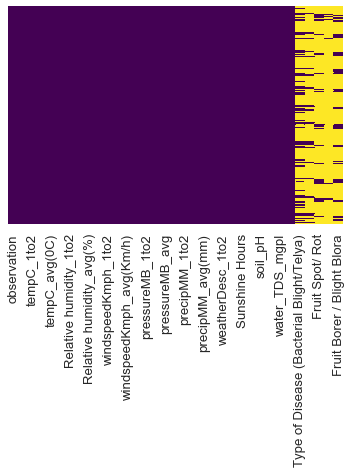

In [19]:
sns.set(font_scale=1.2)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Convert the following columns:
- weatherDesc_7to8, weatherDesc_1to2, weatherDesc_6to7
- priority: Heavy Rainfall (1), Moderate rainfall (2), less or irregular or patchy rainfall(3), cloudy weather (4) and sunny or clear weather (5-No disease)
- 'Clear', 'Cloudy', 'Fog', 'Heavy rain', 'Heavy rain at times', 'Light drizzle', 'Light rain', 'Light rain shower', 'Mist', 'Moderate or heavy rain shower', 'Moderate rain', 'Moderate rain at times', 'Overcast', 'Partly cloudy', 'Patchy light drizzle', 'Patchy light rain', 'Patchy light rain with thunder', 'Patchy rain possible', 'Sunny', 'Thundery outbreaks possible', 'Torrential rain shower'

In [ ]:
df['weatherDesc_7to8'].unique(), len(df['weatherDesc_7to8'].unique())

In [ ]:
df['weatherDesc_7to8'].value_counts()

In [ ]:
df['weatherDesc_1to2'].unique(), len(df['weatherDesc_1to2'].unique())

In [ ]:
df['weatherDesc_1to2'].value_counts()

In [ ]:
df['weatherDesc_6to7'].unique(), len(df['weatherDesc_6to7'].unique())

In [ ]:
df['weatherDesc_6to7'].value_counts()

In [ ]:
weatherDesc = list(set(list(df['weatherDesc_7to8'].unique()) + list(df['weatherDesc_1to2'].unique()) + list(df['weatherDesc_6to7'].unique())))
weatherDesc.sort()
print(weatherDesc, len(weatherDesc))